In [1]:
import sys

sys.path.append("../../scripts")

import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from pandas import DataFrame
import glob

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

from plot_function import plot_publ, plot_nad_amount, plot_syn_per, plot_exp_data, plot_simu_flux
from convert_csv import analyse_rawfiles, read_model_output
from simulation_parsing_plotting import read_isolated_enzyme_output, plot_isolates_enzymes, plot_3ab_flux

## General settings

In [2]:
suffix = '.csv'
outsuffix = '.svg'
infolder_base = os.path.join('..','..','modelling')
outfolder_base = "plots-modelling"

dim = (10, 5)
ylim = (-5, 105)
xlim = (-2, 51)

### Color settings for cell-lines

In [3]:
colors_cell_lines = pd.Series({
    "293": "#000000",
    "mitoPARP": "#EA3223",
    "pexPARP": "#3E58A5",
    "cytoPARP": "#3AB249",
    "erPARP": "#93539E",
})

## Isolated enzymes experiment: Scan of consumption Vmax

In [4]:
folder = "Isolated_enzymes"
outfolder = os.path.join(outfolder_base, folder)
os.makedirs(outfolder, exist_ok=True)

In [5]:
infiles = ["vmax_consumption_023.txt", "vmax_consumption_0276.txt"]
files = [os.path.join(infolder_base, folder, f) for f in infiles]
df = read_isolated_enzyme_output(files)

Saving plots-modelling/Isolated_enzymes/isolated_enzyme_vmax_scan.svg


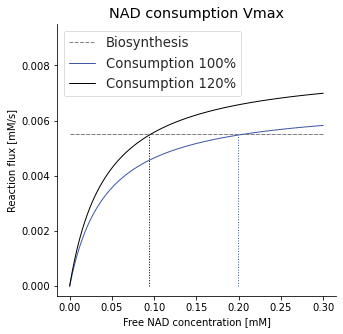

In [6]:
colors = ["black", "#3E58A5", "grey"]
ylines = [(0.199, 0.00548, colors[1]), (0.094, 0.00548, colors[0])]
ylim=[None, 0.0095]
label = {0.23: "Consumption 100%", 0.276: "Consumption 120%"}
outfile = os.path.join(outfolder, f"isolated_enzyme_vmax_scan{outsuffix}")

plot_isolates_enzymes(df, ylines=ylines, ylim=ylim, label=label, show_legend=True, colors=colors, outfile=outfile)

## FK experiment

In [7]:
folder = "Fksimulations"
outfolder = os.path.join(outfolder_base, folder)
os.makedirs(outfolder, exist_ok=True)

In [8]:
infile = os.path.join(infolder_base, folder, "Fk_01.txt")
usecols = ["Values[NAD_labelled_sum]"]
df = read_model_output(infile)

In [9]:
title = "FK866 Simulation"
colors = {"Fk_01": "blue"}

outfile_per = os.path.join(outfolder, f"fk_simulation_per{outsuffix}")
outfile_abs = os.path.join(outfolder, f"fk_simulation_abs{outsuffix}")

Saving plots-modelling/Fksimulations/fk_simulation_per.svg


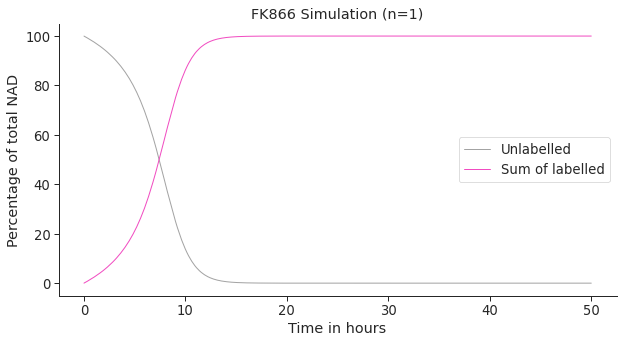

Saving plots-modelling/Fksimulations/fk_simulation_abs.svg


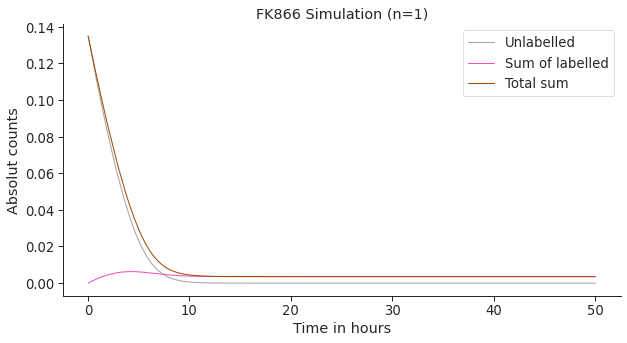

In [10]:
plot_exp_data(
    df,
    yaxis="percental",
    multiplot=False,
    title=title,
    scatter=False,
    trim_label="last",
    dimensions=dim,
    outfile=outfile_per,
)
plot_exp_data(
    df,
    yaxis="absolut",
    multiplot=False,
    title=title,
    scatter=False,
    trim_label="last",
    dimensions=dim,
    outfile=outfile_abs,
)

In [11]:
file_list = [
    "../modelling/3ABsimulations/Fluxes_293_stable_.txt",
    "../modelling/Fksimulations/Fk_01.txt",
]

colors = {}
colors["Fluxes_293_stable_"] = "black"
colors["Fk_01"] = "#0000CC"
labels = {}
labels["Fluxes_293_stable_"] = "293"
labels["Fk_01"] = "with FK866"

In [12]:
df_293 = read_model_output(file_list[0])
df_fk = read_model_output(file_list[1])
df_293["Values[Biosynthesis fluxes]"] = df_293["Values[Biosyntehsi fluxes]"]
df = pd.concat([df_293, df_fk])

outfile_flux_293 = os.path.join(outfolder, f"293_simulation_flux{outsuffix}")
outfile_flux_fk = os.path.join(outfolder, f"fk_simulation_flux{outsuffix}")
outfile_flux_compar = os.path.join(
    outfolder, f"fk_simulation_flux_comparison_293-fk{outsuffix}"
)
plot_simu_flux(
    df_293,
    title="293",
    labels=labels,
    colors=colors,
    show_legend=True,
    outfile=outfile_flux_293,
)
plot_simu_flux(
    df_fk,
    title="FK866",
    labels=labels,
    colors=colors,
    show_legend=True,
    outfile=outfile_flux_fk,
)
plot_simu_flux(
    df,
    title="Flux comparison 293 vs pexPARP",
    labels=labels,
    colors=colors,
    show_legend=True,
    outfile=outfile_flux_compar,
)

FileNotFoundError: [Errno 2] No such file or directory: '../modelling/3ABsimulations/Fluxes_293_stable_.txt'

## Stable cell line experiment: Scan of consumption Vmax

In [ ]:
folder = "cell_lines"
outfolder = os.path.join(outfolder_base, folder)
os.makedirs(outfolder, exist_ok=True)

In [ ]:
infile = os.path.join(infolder_base, folder, "stable_cell_lines.csv")
usecols = ["sum_labelled", "Values[NAD consumption vmax]"]
df = read_model_output(infile)
df = df.loc[:,usecols]
df["Exp"] = df["Values[NAD consumption vmax]"]
df["sum_labelled_percent"] = df["sum_labelled"]
df.drop_duplicates(inplace=True)

In [ ]:
colors_scan = {0.23: "black", 0.25: "red", 0.27: "blue"}
title = "Vmax dependence"
ylabel = "Newly synthesized NAD [mM]"

outfile = os.path.join(outfolder, f"cellline_vmax_scan{outsuffix}")
plot_syn_per(
    df,
    multiplot=colors_scan,
    ylabel=ylabel,
    title=title,
    errorbars=False,
    show_legend=True,
    xlim=[None, 42],
    outfile=outfile,
)

## 3AB-Washout experiments: NAD label time course

In [ ]:
folder = "3ABsimulations"
outfolder = os.path.join(outfolder_base, folder)
os.makedirs(outfolder, exist_ok=True)

experiments = {
    "293": ["Fluxes_293_3AB_stable.txt", "Fluxes_293_3AB_washout.txt"],
    "pexPARP": ["Fluxes_pexPARP_stable_3AB.txt", "Fluxes_pexPARP_washout.txt",],
    "293_vs_pexPARP": ["Fluxes_293_3AB_washout.txt", "Fluxes_pexPARP_washout.txt",],
}

In [ ]:
multiplot_colors = {}
for title, files in experiments.items():
    multiplot_colors[os.path.splitext(files[0])[0]] = "black"  # 3AB
    multiplot_colors[os.path.splitext(files[1])[0]] = "red"  # Washout
    fpathes = [os.path.join(infolder_base, folder, f) for f in files]
    df = read_model_output(fpathes)
    df["Values[Biosynthesis fluxes]"] = df["Values[Biosyntehsi fluxes]"]
    
    outfile_pub = os.path.join(outfolder, f"{title}{outsuffix}")
    outfile_flux = os.path.join(outfolder, f"{title}_flux{outsuffix}")

    plot_publ(
        df, title=title, xmarks="lines", multiplot=multiplot_colors, outfile=outfile_pub, show_legend=True
    )
    plot_3ab_flux(df, title=title, show_legend=True, outfile=outfile_flux)

In [ ]:
for title, files in experiments.items():
    outfile_abs = os.path.join(outfolder, f"{title}_abs{outsuffix}")
    outfile_per = os.path.join(outfolder, f"{title}_per{outsuffix}")
    outfile_flux = os.path.join(outfolder, f"{title}_fluxes{outsuffix}")

    fpathes = [os.path.join(infolder_base, folder, f) for f in files]
    df = read_model_output(fpathes)
    df["Values[Biosynthesis fluxes]"] = df["Values[Biosyntehsi fluxes]"]

    plot_exp_data(
        df,
        yaxis="absolut",
        multiplot=True,
        title=title,
        scatter=False,
        trim_label="first",
        ylabel="NAD concentration [mM]",
        dimensions=dim,
        outfile=outfile_abs,
    )
    plot_exp_data(
        df,
        yaxis="percental",
        multiplot=True,
        title=title,
        scatter=False,
        trim_label="first",
        dimensions=dim,
        outfile=outfile_per,
    )

### Single plots

In [ ]:
file_list = []
for title, files in experiments.items():
    file_list.extend(files)
file_list = [os.path.join(infolder_base, folder, f) for f in file_list]

df = read_model_output(file_list)
df["Values[Biosynthesis fluxes]"] = df["Values[Biosyntehsi fluxes]"]

for exp, data in df.groupby("Exp"):
    title = "_".join(os.path.splitext(exp)[0].split("_")[1:])
    print
    outfile_abs = os.path.join(outfolder, f"{title}_abs{outsuffix}")
    outfile_per = os.path.join(outfolder, f"{title}_per{outsuffix}")
    outfile_flux_comp = os.path.join(outfolder, f"293_pexPARP_fluxes_comparision{outsuffix}")

    plot_exp_data(
        data,
        yaxis="absolut",
        title=title,
        scatter=False,
        half_life=True,
        outfile=outfile_abs,
    )
    plot_exp_data(
        data,
        yaxis="percental",
        title=title,
        scatter=False,
        half_life=True,
        outfile=outfile_per,
    )
plot_3ab_flux(df, show_legend=True, outfile=outfile_flux_comp)